# Обучение модели

## Загрузка корпуса (роман "Frankenstein", Мери Шелли)

In [43]:
with open('frankenstein.txt', 'r', encoding='utf-8') as f:
    data = f.read()

data[:200]

'Letter 1\nTo Mrs. Saville, England.\n\nSt. Petersburgh, Dec. 11th, 17—.\n\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil'

## Предобработка

In [44]:
import re

def clean_text(text: str):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

clean_data = clean_text(data)
clean_data[:200]



'letter to mrs saville england st petersburgh dec th you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings i arr'

In [45]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(clean_data)
doc = [token.text for token in doc]
doc[:10]

['letter',
 'to',
 'mrs',
 'saville',
 'england',
 'st',
 'petersburgh',
 'dec',
 'th',
 'you']

## Обучение

In [46]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[doc], vector_size=100, window=5, min_count=1, workers=4)

In [69]:
model.wv['monster']

array([-2.8763043e-03, -7.0329737e-03, -1.4921606e-03, -9.4141606e-03,
       -8.1113931e-03,  6.1031687e-03, -9.4611729e-03, -5.0577819e-03,
        1.6384923e-03,  8.9361286e-03, -9.0203527e-03, -3.9695455e-03,
        1.5193677e-03,  5.5184844e-04,  5.5072415e-03,  6.5494203e-03,
       -3.5079443e-03,  2.3512221e-03, -3.9858185e-03, -3.1674015e-03,
       -2.1453560e-03, -6.9241058e-03, -4.1979314e-03,  1.9235099e-03,
        1.9203031e-03, -4.1717314e-03, -9.5459977e-03,  1.1101377e-03,
        5.1626968e-03,  5.1240982e-03,  7.2975155e-05,  7.3190369e-03,
        5.7107722e-03, -2.8363944e-03, -1.1914647e-03, -2.9849662e-03,
        8.2355831e-03, -7.0377328e-03,  8.7000644e-03, -7.8797759e-03,
       -6.7692683e-03, -6.9647180e-03, -3.5335862e-03,  6.0742378e-04,
       -8.5460870e-03, -2.3014890e-03,  2.1344102e-03,  1.5605772e-03,
       -3.5023249e-03, -4.1418169e-03,  4.0387702e-03, -7.3866639e-03,
        7.8984722e-03, -2.1999204e-03,  9.4595095e-03,  9.5671229e-03,
      

In [48]:
model.wv.most_similar(['frankenstein'])

[('subdued', 0.30412179231643677),
 ('fits', 0.30067411065101624),
 ('drunken', 0.2934393286705017),
 ('coasting', 0.291166216135025),
 ('pistol', 0.2829813063144684),
 ('obstacle', 0.28248700499534607),
 ('sobbed', 0.2716064155101776),
 ('detrimental', 0.27121737599372864),
 ('hearer', 0.2660970985889435),
 ('audible', 0.2660510540008545)]

In [66]:
model.wv.similarity('monster', 'frankenstein')

0.051518276

In [85]:
model.wv.doesnt_match(['frankenstein', 'god', 'monster'])

'god'

In [51]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

## Визуализация 
Как описывается монстр в романе

In [80]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='r')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

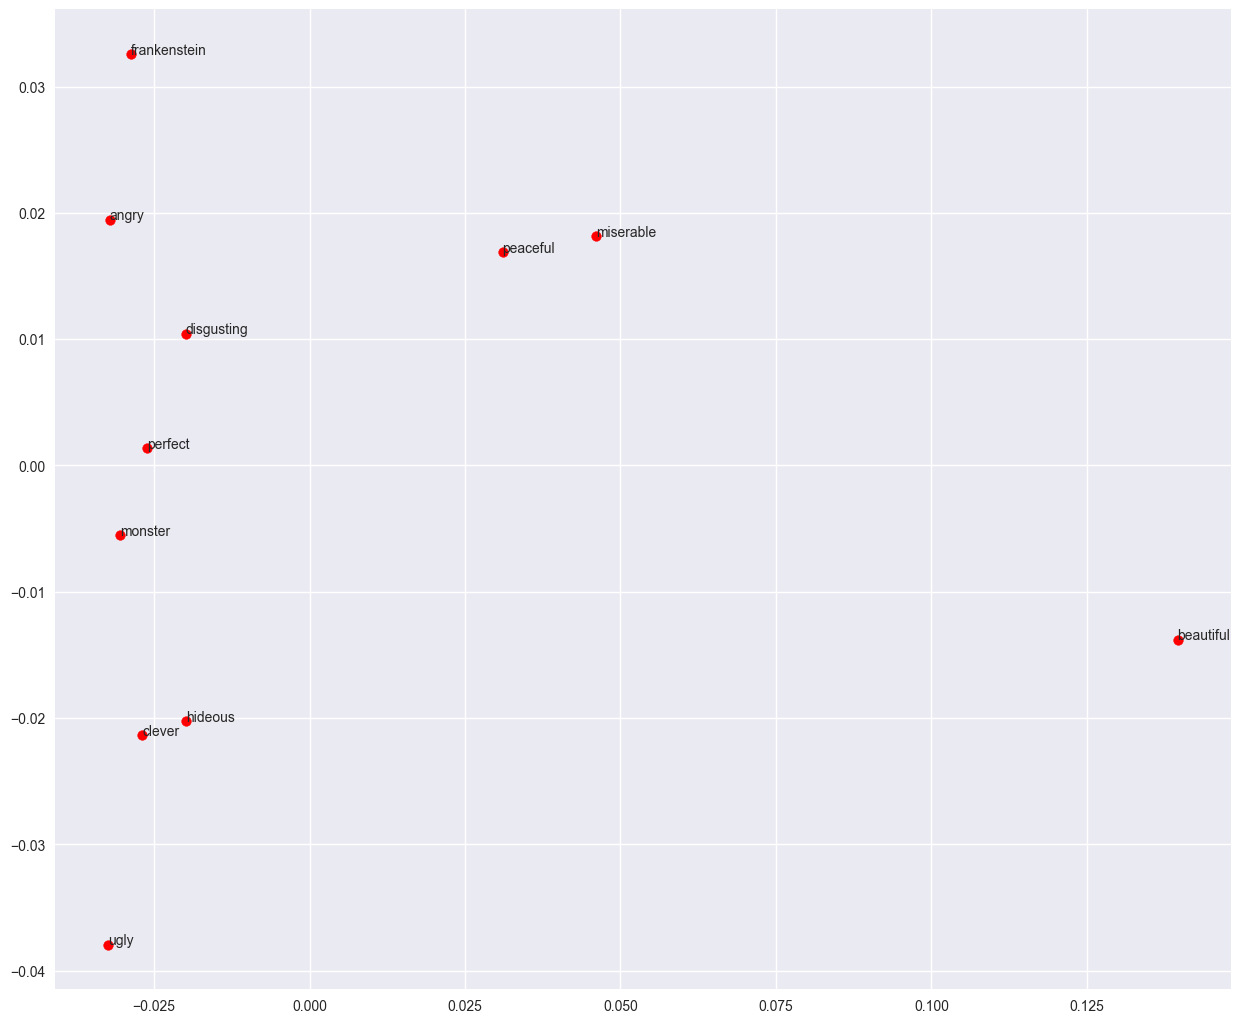

In [82]:
pca_scatterplot(model, ['monster', 'frankenstein', 'miserable', 'perfect', 'hideous', 'disgusting', 'ugly', 'angry', 'beautiful', 'clever', 'peaceful'])